<a href="https://colab.research.google.com/github/javmencia/COBWEBfiles/blob/main/STA410_Week9_CC8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA410 Week 9 Coding Challenge (4 points)

If you experience technical issues while working on this coding challenge, post your issue on [piazza](https://piazza.com/class/m5h6cuchjnbns/) [https://piazza.com/utoronto.ca/winter2025/sta410]. Any messages that need to be communicated to the class during the coding challenge will be posted in the same way.

## Rules

1. **This is an individual assignment.** You are not permitted to engage in any form of contact with other live human beings while working on this challenge.


2. You are encouraged to seek support and adapt code you find available online **(including using AI chat bot suppport tools)** into your notebook; however, if you do so please provide a link to the utilized resource. ***If you don't and multiple students have the same answer an academic integrity proceeding may be undertaken.***  


3. The same instructions as given in the homework regarding notebook autotesting requirements apply.


## Understand and agree to follow the rules of the Coding Challenge

In [1]:
q0 = "I, Javier Mencia, understand "+\
     "and will follow by the rules of the coding challenge."
# Failure to confirm will result in a loss of points

In [2]:
# you may use any functions available from the following library imports

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')
import pandas as pd


## Lasso: least absolute shrinkage and selection operator</sub>

**Lasso regression** and **ridge regression** are **machine learning** (predictive modeling) techniques that incorporate **shrinkage regularization** into ***linear model regression*** by using the **penalized least squares** objective functions with $\lambda>0$

$$\underset{\text{Lasso Regression $L_1$ coefficient penalty}}{\underline{\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \sum_k |\beta_k|}}\quad\quad \underset{\text{Ridge Regression $L_2^2$ coefficient penalty}}{\underline{\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \beta^T\beta}}$$

Focussing on **Lasso regression**, the objective function is **convex** (because the sum of two **convex** functions is **convex**), and specifically **separablely convex** because it's of the form

$$g(\beta) + \sum_{k=0}^K g_k(\beta_k)$$

where $g$ is **differentiable** everywhere and each $g_k$ is **convex**. When a function is **separablely convex** then it can be optimized by **coordinate descent**.


### Part 1 (1 point): coordinate descent specification

1. Suppose the data is standardized such that $\bar y = 0$ and each column is centered so that $\bar X_{\cdot j}=0$ and scaled so that $\frac{X_{\cdot j}^TX_{\cdot j}}{n}=1$. Of the options below, which is the simplest expression (requiring the fewest computations) for the objective function

    $$(y-X_{\cdot -j}\beta_{-j} - X_{\cdot j}\beta_{j})^T(y-X_{\cdot -j}\beta_{-j} - X_{\cdot j}\beta_{j}) + \lambda |\beta_{j}|$$

    for $\beta_{j}$ that could be used to optimize for $\beta_{j}$ using **coordinate descent**?<br><br>

    1. (A) $\quad n\beta_j^2 - 2\beta_j \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right) + (y-X_{\cdot -j}\beta_{-j})^T(y-X_{\cdot -j}\beta_{-j}) + \lambda |\beta_{j}|$  
    2. (B) $\quad n\beta_j^2 - 2\beta_j \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right) + (y-X_{\cdot -j}\beta_{-j})^T(y-X_{\cdot -j}\beta_{-j})$  

    3. (C) $\quad n\beta_j^2 - 2\beta_j \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right) + \lambda |\beta_{j}|$  

    4. (D) $\quad n\beta_j^2 - 2\beta_j \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right)$<br><br>

2. For $\lambda>0$, which of the following conditions for $\phi_j = \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right)$ cannot lead to negative values for the following?

    $$- 2\beta_j \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right) + \lambda |\beta_{j}|$$

    1. (A) $\quad\phi_j > \frac{\lambda}{2}$
    2. (B) $\quad\phi_j < -\frac{\lambda}{2}$
    3. (C) $\quad\phi_j \in \left[ - \frac{\lambda}{2}, \frac{\lambda}{2}\right]$
    4. (D) $\quad$None of the above<br><br>
    
3. The previous problem demonstrates that the function

   $$n\beta_j^2 - 2\beta_j \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right) + \lambda |\beta_{j}|$$

    cannot be negative for a specific constraint on $\phi_j$. What value of $\beta_{j}$ then would minimize this function under this constraint?<br><br>

    1. (A) $\quad\beta_j=0$
    2. (B) $\quad$Some $\beta_j>0$
    3. (C) $\quad$Some $\beta_j<0$
    4. (D) $\quad$Some cominbation of the above<br><br>
    
4. Suppose $\beta_j \times \epsilon > 0$ for $\epsilon>0$. Can $n\beta_j^2 - \beta_j \times \epsilon$ be negative for some value of $\beta_j$?

    1. (A) $\quad$Yes
    2. (B) $\quad$No
    3. (C) $\quad$Only for certain values of $n$
    4. (D) $\quad$Only for certain values of $\epsilon$<br><br>
    
5. The last problem demonstrates the possible sign of the first two terms of the function  

    $$\rlap{\overbrace{\phantom{n\beta_j^2 - 2\beta_j \sum_i \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right)}}} n\beta_j^2 - \underbrace{ 2\beta_j \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right) + \lambda |\beta_{j}|}$$

     while the considerations of a previous problem demonstrate the sign of the last two terms when $\phi_j = \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right) \not \in \left[ - \frac{\lambda}{2}, \frac{\lambda}{2}\right]$. What value for $\beta_j$ minimizes this function in the case that $\phi_j \not \in \left[ - \frac{\lambda}{2}, \frac{\lambda}{2}\right]$ and the signs of the first two and last two terms agree?<br><br>

    1. (A) $\quad\beta_j=0$
    2. (B) $\quad\beta_j = \frac{1}{n}(y - X_{\cdot -j} \beta_{-j})^TX_{\cdot j}$
    3. (C) $\quad\beta_j = \frac{1}{n} \left[ (y - X_{\cdot -j} \beta_{-j})^TX_{\cdot j} - \lambda \times \beta_{j} \right]$
    4. (D) $\quad\beta_j = \frac{1}{n} \left[ (y - X_{\cdot -j} \beta_{-j})^TX_{\cdot j} - \lambda \times \text{sign}(\beta_{j}) \right]$
    5. (E) $\quad\beta_j = \frac{1}{n} \left[ (y - X_{\cdot -j} \beta_{-j})^TX_{\cdot j} - \frac{1}{2} \lambda \times \text{sign}(\beta_{j}) \right]$
    


In [3]:
# 0.2 points each

p1q1 = "C"
p1q2 = "C"
p1q3 = "A"
p1q4 = "C"
p1q5 = "D"


### Part 2 (1 point): lasso

Define the function `fit_lasso(X, y, beta0, lambda_, epsilon, K=1000)` which, for a given $\lambda$, uses ***coordinate descent*** to compute the ***lasso regression*** coefficients which optimize the function

$$\min_{\beta|\lambda} \sum_i (y_i-x_i^T \beta)^2 + \lambda \sum_k |\beta_k|$$
    
Your `fit_lasso` function will be tested directly so you don't need to assign any other variables for this problem.
  
> The `np.sign()` and `np.abs()` functions will likely be useful, as may `np.c_[columns_1, columns_2]` which concatenates columns together and `np.r_[rows_1,rows_2]` concatenates rows together.


In [4]:
def fit_lasso(X, y, beta0, lambda_, epsilon, K=1000):
    '''
    Lasso Regression fitting using coordinate descent

    X     [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y     [np.array shape=(n,p)]: mean 0 column
    beta0 [np.array shape=(p,1)]: initial value

    lambda_ [float > 0]: regularization hyperparameter:
                         the larger this value the greater the regularization
    epsilon [float > 0]: trigger early stopping and return beta if
                         (beta-beta0).T.dot(beta-beta0) < epsilon
    K         [int > 0]: default 1000 maximum number of interations

    returns Lasso regression beta-hat of yhat = X beta-hat
    '''

    beta = beta0.copy()
    n, p = X.shape

    for k in range(K):
        beta_old = beta.copy()

        for j in range(p):
            X_j = X[:, j]
            residual = y - (X @ beta) + beta[j] * X_j[:, np.newaxis]
            rho = X_j.T @ residual

            if np.abs(rho) > lambda_:
                beta[j] = (np.sign(rho) * (np.abs(rho) - lambda_)) / (X_j.T @ X_j)
            else:
                beta[j] = 0

        if np.linalg.norm(beta - beta_old) < epsilon:
            return beta

    return beta

In [5]:
# Cell for scratch work

# You are welcome to add cells into your notebook but
# just don't runtime errors anywhere in your notebook
# as cells are run sequentially for automated testing

# Automated testing is looking for cells (`cell ids`)
# where you're asked to enter answers or complete code
# but all other cells like this one or cells you add
# are safe to delete if you want a "cleaner" notebook


In [6]:
# Cell for scratch work


In [7]:
mtcars = sm.datasets.get_rdataset("mtcars")
y = mtcars.data[['mpg']].values
y = y-y.mean()
X = mtcars.data[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']].values
X = (X-X.mean(axis=0))
X = X / (X**2).mean(axis=0)**0.5
model = sm.OLS(y,X); results = model.fit()
beta0 = results.summary2().tables[1].values[:,:1]
beta0

array([[-0.19588953],
       [ 1.626723  ],
       [-1.44967936],
       [ 0.4142235 ],
       [-3.57801491],
       [ 1.444047  ],
       [ 0.15763526],
       [ 1.23776483],
       [ 0.47595069],
       [-0.31702919]])

In [8]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              14.60
Date:                Fri, 07 Mar 2025   Prob (F-statistic):                    1.59e-07
Time:                        19:10:57   Log-Likelihood:                         -69.855
No. Observations:                  32   AIC:                                      159.7
Df Residuals:                      22   BIC:                                      174.4
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1959      1.795     -0.109      0.914      -3.918       3.526
x2             1.6267      2.128      0.764      0.453      -2.787       6.041
x3            -1.4497      1.435     -1.010      0.323      -4.426       1.527
x4             0.4142      0.841      0.493      0.627      -1.330       2.158
x5            -3.5780      1.782     -2.007      0.057      -7.275       0.119
x6             1.4440      1.256      1.150      0.263      -1.160       4.049
x7             0.1576      1.020      0.155      0.879      -1.958       2.273
x8             1.2378      0.987      1.254      0.223      -0.809       3.284
x9             0.4760      1.059      0.449      0.658      -1.721       2.673
x10           -0.3170      1.287     -0.246      0.808      -2.987       2.353
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                         15.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Part 3 (1 point): ridge and lasso trajectories

define the functions

- `fit_ridge(X, y, beta0, lambda_, epsilon, K=1000)`
- `get_lasso_beta_trajectories(X, y, lambdas)`
- `get_ridge_beta_trajectories(X, y, lambdas)`

where `fit_ridge` uses **coordinate descent** analogously to `fit_lasso` and `get_ridge_beta_trajectories` is analogous `get_lasso_beta_trajectories` which returns the sequence of `fit_lasso` results

1. sequentially called for each value in the (increasing) `lambdas`
2. where the first initialization `beta0` is the unregularized least squares regression fit
3. and the subsequent initializations are the fits returned from the sequentially preceeding `fit_lasso` function call in the `lambdas` sequence

Show that all your functions work by creating the shrinkage plots using the code below.

Your functions will be tested directly so you don't need to assign any other variables for this problem.


In [9]:
def get_lasso_beta_trajectories(X, y, lambdas):
    '''
    Lasso Regularization fits across regulation parameters

    X     [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y     [np.array shape=(n,p)]: mean 0 column
    lambdas [np.array shape=(q)]: regularization hyperparameters with
                                  increasing lambdas (regularization strength)
                                  where 0 indicates no regulation and
                                  beta-hat is 0 for some large number

    returns betas with betas.shape=(p,k+1) which are the Lasso fits
            across the lambdas fit from least to most regularization
    '''

    model = sm.OLS(y, X); results = model.fit()
    beta0 = results.summary2().tables[1].values[:,:1]
    betas = np.zeros((X.shape[1], 1 + len(lambdas)))
    betas[:, :1] = beta0.copy()

    for i, lambda_ in enumerate(lambdas):
        beta0 = fit_lasso(X, y, beta0, lambda_, epsilon=1e-10, K=1000)
        betas[:, i + 1] = beta0.ravel()

    return betas

In [10]:
def fit_ridge(X, y, beta0, lambda_, epsilon, K=1000):
    '''
    Ridge Regression fitting using coordinate descent

    X     [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y     [np.array shape=(n,p)]: mean 0 column
    beta0 [np.array shape=(p,1)]: initial value

    lambda_ [float > 0]: regularization hyperparameter:
                         the larger this value the greater the regularization
    epsilon [float > 0]: trigger early stopping and return beta if
                         (beta-beta0).T.dot(beta-beta0) < epsilon
    K         [int > 0]: default 1000 maximum number of interations

    returns Ridge regression beta-hat of yhat = X beta-hat
    '''
    beta = beta0.copy()
    n, p = X.shape

    for k in range(K):
        beta_old = beta.copy()

        for j in range(p):
            X_j = X[:, j]
            residual = y - (X @ beta) + beta[j] * X_j[:, np.newaxis]
            rho = X_j.T @ residual

            beta[j] = rho / (X_j.T @ X_j + lambda_)

        if np.linalg.norm(beta - beta_old) < epsilon:
            return beta

    return beta

In [11]:
def get_ridge_beta_trajectories(X, y, lambdas):
    '''
    Ridge Regularization fits across regulation parameters

    X     [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y     [np.array shape=(n,p)]: mean 0 column
    lambdas [np.array shape=(q)]: regularization hyperparameters with
                                  increasing lambdas (regularization strength)
                                  where 0 indicates no regulation and
                                  beta-hat is 0 for some large number

    returns betas with betas.shape=(p,k+1) which are the Ridge fits
            across the lambdas fit from least to most regularization
    '''

    model = sm.OLS(y, X); results = model.fit()
    beta0 = results.summary2().tables[1].values[:,:1]
    betas = np.zeros((X.shape[1], 1 + len(lambdas)))
    betas[:, :1] = beta0.copy()

    for i, lambda_ in enumerate(lambdas):
        beta0 = fit_ridge(X, y, beta0, lambda_, epsilon=1e-10, K=1000)
        betas[:, i + 1] = beta0.ravel()

    return betas


In [12]:
# Cell for scratch work

# You are welcome to add cells into your notebook but
# just don't runtime errors anywhere in your notebook
# as cells are run sequentially for automated testing

# Automated testing is looking for cells (`cell ids`)
# where you're asked to enter answers or complete code
# but all other cells like this one or cells you add
# are safe to delete if you want a "cleaner" notebook


In [13]:
# Cell for scratch work

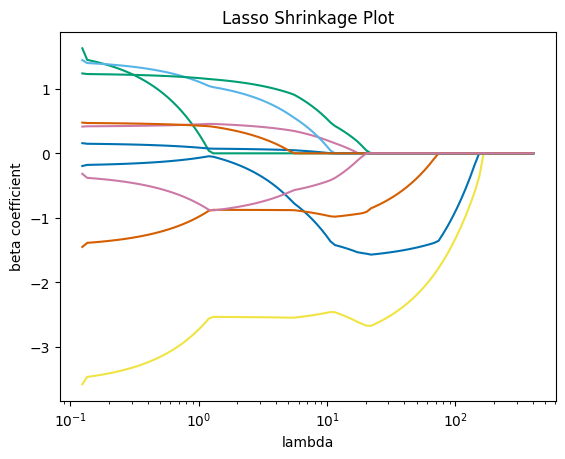

In [14]:
loglambdas = np.linspace(-2, 6, 100)
lambdas = np.exp(loglambdas)
betas = get_lasso_beta_trajectories(X, y, lambdas)
for i in range(betas.shape[0]):
    plt.plot(np.concatenate([np.array([lambdas[0] - (lambdas[1]-lambdas[0])]), lambdas]), betas[i,:])
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("beta coefficient")
plt.title("Lasso Shrinkage Plot");

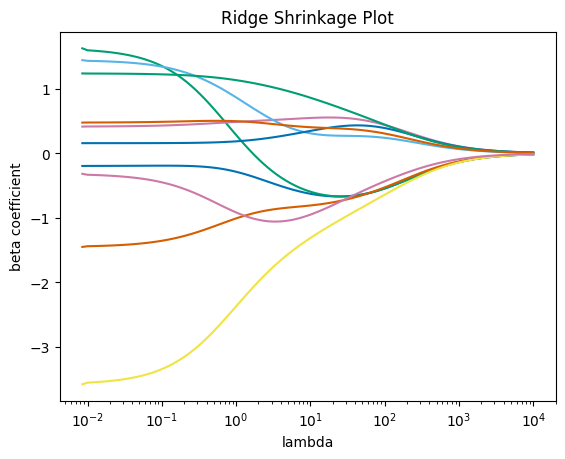

In [15]:
lambdas = np.logspace(-2, 4, 100)
betas = get_ridge_beta_trajectories(X, y, lambdas)
for i in range(betas.shape[0]):
    plt.plot(np.concatenate([np.array([lambdas[0] - (lambdas[1]-lambdas[0])]), lambdas]), betas[i,:])
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("beta coefficient")
plt.title("Ridge Shrinkage Plot");

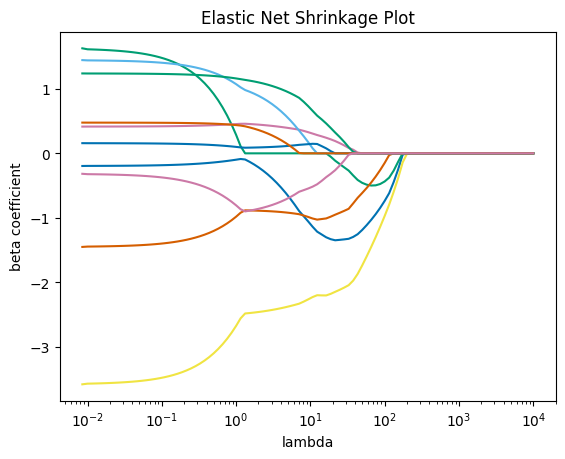

In [16]:
# FOR p4q8

def fit_elastic_net(X, y, beta0, lambda_, alpha, epsilon, K=1000):
    '''
    Elastic Net Regression fitting using coordinate descent

    X       [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y       [np.array shape=(n,p)]: mean 0 column
    beta0   [np.array shape=(p,1)]: initial value

    lambda_ [float > 0]: regularization hyperparameter (controls strength)
    alpha   [float in (0,1)]: balance between L1 (lasso) and L2 (ridge)
                             alpha=1 is Lasso, alpha=0 is Ridge
    epsilon [float > 0]: early stopping threshold
    K       [int > 0]: max number of iterations (default: 1000)

    returns Elastic Net regression beta-hat of yhat = X beta-hat
    '''
    beta = beta0.copy()
    n, p = X.shape

    for k in range(K):
        beta_old = beta.copy()

        for j in range(p):
            X_j = X[:, j]
            residual = y - (X @ beta) + beta[j] * X_j[:, np.newaxis]
            rho = X_j.T @ residual

            denom = X_j.T @ X_j + (1 - alpha) * lambda_
            soft_threshold = np.sign(rho) * max(abs(rho) - alpha * lambda_, 0)
            beta[j] = soft_threshold / denom

        if np.linalg.norm(beta - beta_old) < epsilon:
            return beta

    return beta

def get_elastic_net_beta_trajectories(X, y, lambdas, alpha):
    '''
    Elastic Net fits across regularization parameters

    X       [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y       [np.array shape=(n,p)]: mean 0 column
    lambdas [np.array shape=(q)]: increasing regularization strengths
    alpha   [float in (0,1)]: balance between L1 (lasso) and L2 (ridge)

    returns betas with shape=(p, len(lambdas)+1) for fits across lambdas
    '''
    model = sm.OLS(y, X)
    results = model.fit()
    beta0 = results.summary2().tables[1].values[:, :1]
    betas = np.zeros((X.shape[1], 1 + len(lambdas)))
    betas[:, :1] = beta0.copy()

    for i, lambda_ in enumerate(lambdas):
        beta0 = fit_elastic_net(X, y, beta0, lambda_, alpha, epsilon=1e-10, K=1000)
        betas[:, i + 1] = beta0.ravel()

    return betas

lambdas = np.logspace(-2, 4, 100)
betas = get_elastic_net_beta_trajectories(X, y, lambdas, 0.9)
for i in range(betas.shape[0]):
    plt.plot(np.concatenate([np.array([lambdas[0] - (lambdas[1]-lambdas[0])]), lambdas]), betas[i,:])
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("beta coefficient")
plt.title("Elastic Net Shrinkage Plot");

### Part 4 (1 point): wrap up


In [17]:


p4q1 = "Lasso removes coefficients by comparing the magnitude of the D"
# A: coefficients against the lambda value
# B: coefficients against the log of the lambda value
# C: sum of the residuals their covariates predict against the lambda value
# D: inner product of covariates and the residuals they predict against the lambda value

p4q2 = "Lasso removes covariates based on C"
# A: linear independence
# B: orthogonality
# C: correlation
# D: covariance

p4q3 = "Lasso covariates are standardized under the assumption that "+\
       "covariate C should not drive variable selection"
# A: correlation
# B: covariance
# C: magnitude
# D: multicollinearity

p4q4 = "Scaling a centered covariate by a factor of two requires "+\
       "B of the regularization lambda for that covariate "+\
       "to maintain an equivalent variable selection behavior to "+\
       "an original unscaled version of the specification"
# A: a corresponding doubling
# B: a corresponding halfing
# C: no corresponding change
# D: None of the above

p4q5 = "Lasso variable selection is used to produce an optimal bias-variance "+\
       "tradeoff in terms of out of sample predictive performance; however, "+\
       "the consistency of the variable selection depends on the variance of the "+\
       "C"
# A: variance of the diagonal of the covariate matrix
# B: variance of the off-diagonal of the covariate matrix
# C: A and B above in combination with the variance of coefficient shrinkage regularization
# D: B above in combination with the variance of coefficient shrinkage regularization

p4q6 = "The previous lasso regression fit is used as the initial value "+\
       "for the next lasso regression fit with the next incrementally increased "+\
       "regularization lambda C"
# A: for convenience since it is immediately available
# B: for convenience so the least squares fit doesn't have to be recalculated
# C: since it is likely close relative to the next lasso penalized fit
# D: but this is unneccessary since any other initalization would be just as good


### Orthogonal ridge

For centered and scaled $X$ as above and an additional assumption of **orthogonality** in the columns of $X$ (such as in PCR through the use of $U$ from $X=UDV^T$), the **ridge regression** solution can be shown to be

   $$\hat \beta_j^{ridge} = \frac{n}{n+\lambda} \hat \beta_j^{LS} $$
  
   for $\hat \beta_j^{LS}$ equal to the $j$ coeficient of the least squares estimate $(U^TU)^{-1}U^Ty$.
   
### Elastic net

The **elastic net** combines **lasso** and **ridge regression** through the loss function

   $$\min_{\beta|\lambda_L,\lambda_R} \sum_i x_{ij}(y_i-x_i^T \beta)^2 + \lambda_L \sum_k |\beta_k| + \lambda_R \sum_k \beta_k^2$$
    which is equivalent to
    $$\min_{\beta|\lambda_L,\lambda_R} (n+\lambda_R)\beta_j^2 - 2\beta_j \sum_i x_{ij} \left( y_i - \sum_{k\neq j} x_{ik}\beta_k \right) + \lambda_L |\beta_{j}|$$
    
   
7. How many of **lasso regression**, **ridge regression**, **elastic net**, and the **orthogonality**-based $\hat \beta_j^{ridge}$ **regression** have the ability to set $\beta_j$ coefficients to $0$?<br><br>

    1. (A) 0
    2. (B) 1
    3. (C) 2
    4. (D) 3
    5. (E) 4<br><br>

8. How many of **lasso regression**, **ridge regression**, **elastic net**, and the **orthogonality**-based $\hat \beta_j^{ridge}$ **regression** necessarily converge monotonically towards $0$?<br><br>

    1. (A) 0
    2. (B) 1
    3. (C) 2
    4. (D) 3
    5. (E) 4<br><br>

9. Which of the following best describes how shrinkage can be interpreted in **elastic net**?<br><br>

    1. (A) **Ridge** shrinkage is applied to each coefficient after **lasso** shrinkage by scaling by $(n+\lambda_R)^{-1}$ rather than $n^{-1}$
    2. (B) ***Ridge*** shrinkage is applied by setting $\hat \beta_j^{ridge} =   \frac{n}{n+\lambda_R} \hat \beta_j^{LS}$ and then applying the ***lasso*** shrinkage adjustment    
    3. (C) ***Ridge*** shrinkage is applied as a final adjustment setting $\hat \beta^{elastic net} =   \frac{n}{n+\lambda_R} \hat \beta^{lasso}$ based on the final ***lasso*** estimate
    4. (D) None of the these options<br><br>
    
10. **Tikhonov regularization** estimates $\hat \beta^{Tikhonov}$ which soves $(X^TX + \lambda I)\beta = (X\beta)^Ty$ resulting from optimization of
$\nabla \beta \left[ (y-X\beta)^T(y-X\beta) + \lambda\beta^T\beta \right] = \beta^TX^TX\beta + \lambda\beta^T\beta - 2 (X\beta)^Ty \Longrightarrow 2X^TX\beta + \lambda2\beta - 2 (X\beta)^Ty = 0$. **Ridge regression** should be estimated as<br><br>

    1. (A) Coordinate Descent (as is done here)
    2. (B) Matrix inversion
    3. (C) Solving $Ax=b$
    4. (D) $\frac{n}{n+\lambda} \hat \beta_j^{LS}$
    


In [18]:
p4q7 = "C"
p4q8 = "C"
p4q9 = "C"
p4q10 = "C"

In [19]:
# Cell for scratch work

# You are welcome to add cells into your notebook but
# just don't runtime errors anywhere in your notebook
# as cells are run sequentially for automated testing

# Automated testing is looking for cells (`cell ids`)
# where you're asked to enter answers or complete code
# but all other cells like this one or cells you add
# are safe to delete if you want a "cleaner" notebook


In [20]:
# Cell for scratch work
